In [2]:
import tensorflow as tf
import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Activation, BatchNormalization, Dropout
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#load the dataset
(xtrain,ytrain), (xtest,ytest)=mnist.load_data()
xtrain=xtrain.astype('float32')/255.
xtest=xtest.astype('float32')/255.
xtrain=xtrain.reshape((len(xtrain),np.prod(xtrain.shape[1:])))
xtest=xtest.reshape((len(xtest),np.prod(xtest.shape[1:])))

In [4]:
print('xtrain shape is:',xtrain.shape)
print('xtest shape is:',xtest.shape)

xtrain shape is: (60000, 784)
xtest shape is: (10000, 784)


In [20]:
inputdim=28*28
latentdim=2

In [21]:
#Encoder
inputvec=Input(shape=(inputdim,))
enc1=Dense(512) (inputvec)
act1=Activation('relu') (enc1)
enc2=Dense(512) (act1)
bn1=BatchNormalization() (enc2)
act2=Activation('relu') (bn1)
d1=Dropout(0.2) (act2)

enc3=Dense(128) (d1)
act3=Activation('relu') (enc3)
enc4=Dense(128) (act3)
bn2=BatchNormalization() (enc4)
act4=Activation('relu') (bn2)
d2=Dropout(0.2) (act4)

enc5=Dense(32) (d2)
act5=Activation('relu') (enc5)
d3=Dropout(0.2) (act5)
enc6=Dense(latentdim) (d3)
bn3=BatchNormalization() (enc6)
encoder=Activation('relu') (bn3)

In [22]:
encode=Model(inputvec,encoder)

In [23]:
#Decoder
dec1=Dense(32) (encoder)
bn4=BatchNormalization() (dec1)
act6=Activation('relu') (bn4)

d4=Dropout(0.2) (act6)
dec2=Dense(128) (d4)
act7=Activation('relu') (dec2)
dec3=Dense(128) (act7)
bn5=BatchNormalization() (dec3)
act8=Activation('relu') (bn5)

d5=Dropout(0.2) (act8)
dec4=Dense(512) (d5)
act9=Activation('relu') (dec4)
dec5=Dense(512) (act9)
bn6=BatchNormalization() (dec5)
act10=Activation('relu') (bn6)
decoder=Dense(inputdim, activation='sigmoid') (act10)

In [24]:
autoencoder=Model(inputvec,decoder)
print(autoencoder.summary())

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_13 (Dense)             (None, 512)               401920    
_________________________________________________________________
activation_11 (Activation)   (None, 512)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 512)               262656    
_________________________________________________________________
batch_normalization_6 (Batch (None, 512)               2048      
_________________________________________________________________
activation_12 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0   

In [25]:
opt=tf.keras.optimizers.RMSprop(learning_rate=0.0001,decay=1e-6)

In [26]:
autoencoder.compile(loss='binary_crossentropy',optimizer=opt)

In [27]:
hist=autoencoder.fit(xtrain,xtrain,epochs=200,batch_size=10000,shuffle=True, validation_data=(xtest,xtest))

Train on 60000 samples, validate on 10000 samples
Epoch 1/200
60000/60000 [==============================] - 5s 76us/sample - loss: 0.7015 - val_loss: 0.6917
Epoch 2/200
60000/60000 [==============================] - 0s 5us/sample - loss: 0.6439 - val_loss: 0.6888
Epoch 3/200
60000/60000 [==============================] - 0s 5us/sample - loss: 0.5986 - val_loss: 0.6842
Epoch 4/200
60000/60000 [==============================] - 0s 5us/sample - loss: 0.5602 - val_loss: 0.6781
Epoch 5/200
60000/60000 [==============================] - 0s 5us/sample - loss: 0.5255 - val_loss: 0.6706
Epoch 6/200
60000/60000 [==============================] - 0s 5us/sample - loss: 0.4939 - val_loss: 0.6616
Epoch 7/200
60000/60000 [==============================] - 0s 5us/sample - loss: 0.4651 - val_loss: 0.6511
Epoch 8/200
60000/60000 [==============================] - 0s 5us/sample - loss: 0.4386 - val_loss: 0.6390
Epoch 9/200
60000/60000 [==============================] - 0s 5us/sample - loss: 0.4149 - val

60000/60000 [==============================] - 0s 5us/sample - loss: 0.2056 - val_loss: 0.2148
Epoch 77/200
60000/60000 [==============================] - 0s 5us/sample - loss: 0.2054 - val_loss: 0.2147
Epoch 78/200
60000/60000 [==============================] - 0s 5us/sample - loss: 0.2051 - val_loss: 0.2143
Epoch 79/200
60000/60000 [==============================] - 0s 5us/sample - loss: 0.2049 - val_loss: 0.2130
Epoch 80/200
60000/60000 [==============================] - 0s 5us/sample - loss: 0.2046 - val_loss: 0.2122
Epoch 81/200
60000/60000 [==============================] - 0s 5us/sample - loss: 0.2045 - val_loss: 0.2111
Epoch 82/200
60000/60000 [==============================] - 0s 5us/sample - loss: 0.2041 - val_loss: 0.2108
Epoch 83/200
60000/60000 [==============================] - 0s 5us/sample - loss: 0.2038 - val_loss: 0.2099
Epoch 84/200
60000/60000 [==============================] - 0s 5us/sample - loss: 0.2037 - val_loss: 0.2095
Epoch 85/200
60000/60000 [===============

60000/60000 [==============================] - 0s 5us/sample - loss: 0.1954 - val_loss: 0.1913
Epoch 152/200
60000/60000 [==============================] - 0s 5us/sample - loss: 0.1956 - val_loss: 0.1914
Epoch 153/200
60000/60000 [==============================] - 0s 5us/sample - loss: 0.1952 - val_loss: 0.1910
Epoch 154/200
60000/60000 [==============================] - 0s 5us/sample - loss: 0.1954 - val_loss: 0.1912
Epoch 155/200
60000/60000 [==============================] - 0s 5us/sample - loss: 0.1953 - val_loss: 0.1910
Epoch 156/200
60000/60000 [==============================] - 0s 5us/sample - loss: 0.1952 - val_loss: 0.1907
Epoch 157/200
60000/60000 [==============================] - 0s 5us/sample - loss: 0.1952 - val_loss: 0.1910
Epoch 158/200
60000/60000 [==============================] - 0s 5us/sample - loss: 0.1950 - val_loss: 0.1909
Epoch 159/200
60000/60000 [==============================] - 0s 5us/sample - loss: 0.1949 - val_loss: 0.1906
Epoch 160/200
60000/60000 [======

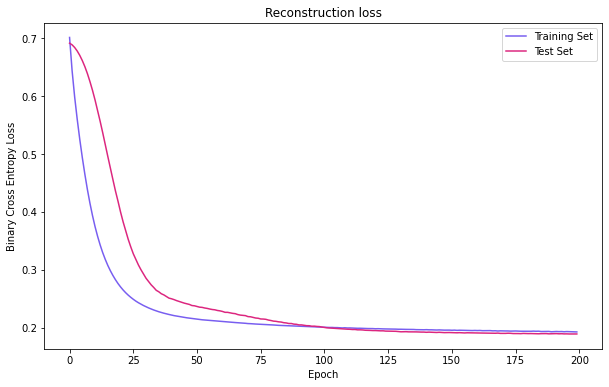

In [28]:
#Visualize loss
fig=plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'],color='#785ef0')
plt.plot(hist.history['val_loss'],color='#dc267f')
plt.title('Reconstruction loss')
plt.ylabel('Binary Cross Entropy Loss')
plt.xlabel('Epoch')
plt.legend(['Training Set','Test Set'],loc='upper right')
plt.show()

In [29]:
reconstructed=autoencoder.predict(xtest)

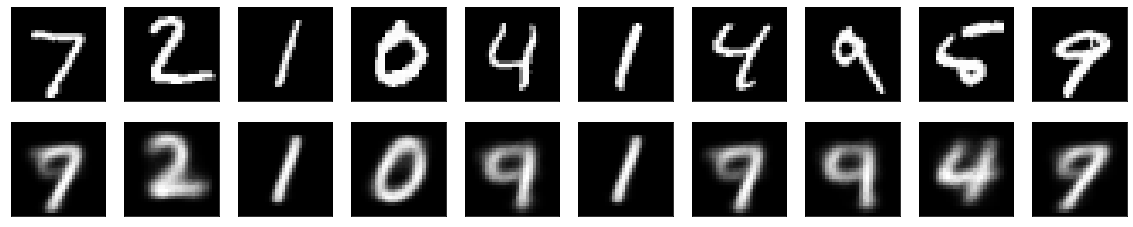

In [30]:
# Display Original and reconstructed images
n = 10
plt.figure(figsize=(20, 6))

for i in range(n):
    # display original
    ax = plt.subplot(3, n, i+1)
    plt.imshow(xtest[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    
    # display reconstruction
    ax = plt.subplot(3, n, i+n+1)
    plt.imshow(reconstructed[i].reshape(28,28))
    plt.gray()
    
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()